# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Manliguez, Sean Arthur\
_Student No._: 2020-07582\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


# PART 1

In [ ]:
mu = 0
sigma = 0.1
N = 100
max_d = 14
x = np.linspace(0,3,N)
eps = np.random.normal(mu, sigma, N)
y = x*np.sin(x) + eps

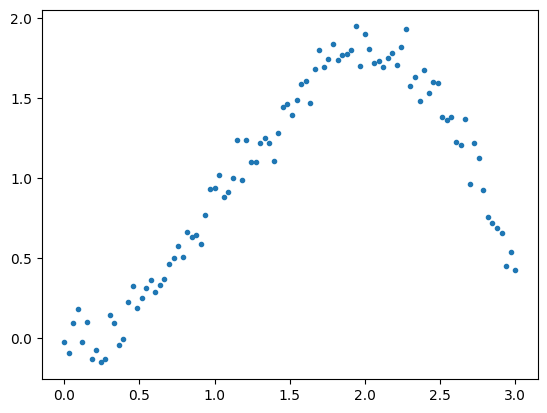

In [ ]:
plt.plot(x,y, ls ='none', marker = '.')

# PART 2

In [ ]:
### Splitting the data set into training, testing, and cross validation

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,train_size = 0.70, random_state = 42)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test.copy(),Y_test.copy(), train_size = 0.50, random_state = 42)

In [ ]:
d = 3 #polynomial degree
best_fit = np.poly1d(np.polyfit(x,y,d))
best_fit
best_y = best_fit(X_train)

Text(0.5, 1.0, 'Training Set Best Fit')

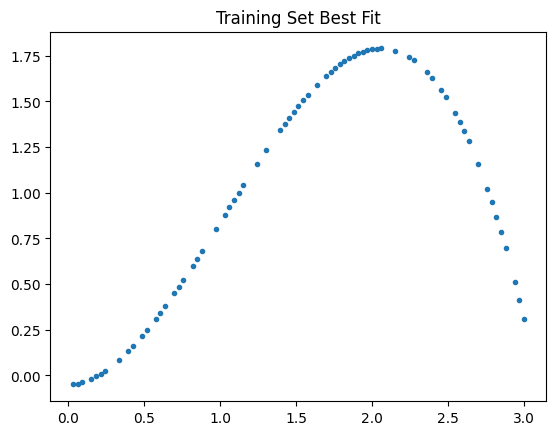

In [ ]:
fig1 = plt.figure()
plt.plot(X_train,best_y, ls = 'none', marker = '.')
plt.title('Training Set Best Fit')

## Calculating the RMSE

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y}_i)^2
$$

In [ ]:
def get_bestfit(x,y,d):
  best_fit = np.poly1d(np.polyfit(x,y,d))
  return best_fit
def calculate_rmse(n,y,y_curve):
  mse = 1/n*np.sum((y_curve-y)**2)
  rmse = np.sqrt(mse)
  return rmse

### Plotting best fit curves of varying degree polynomial

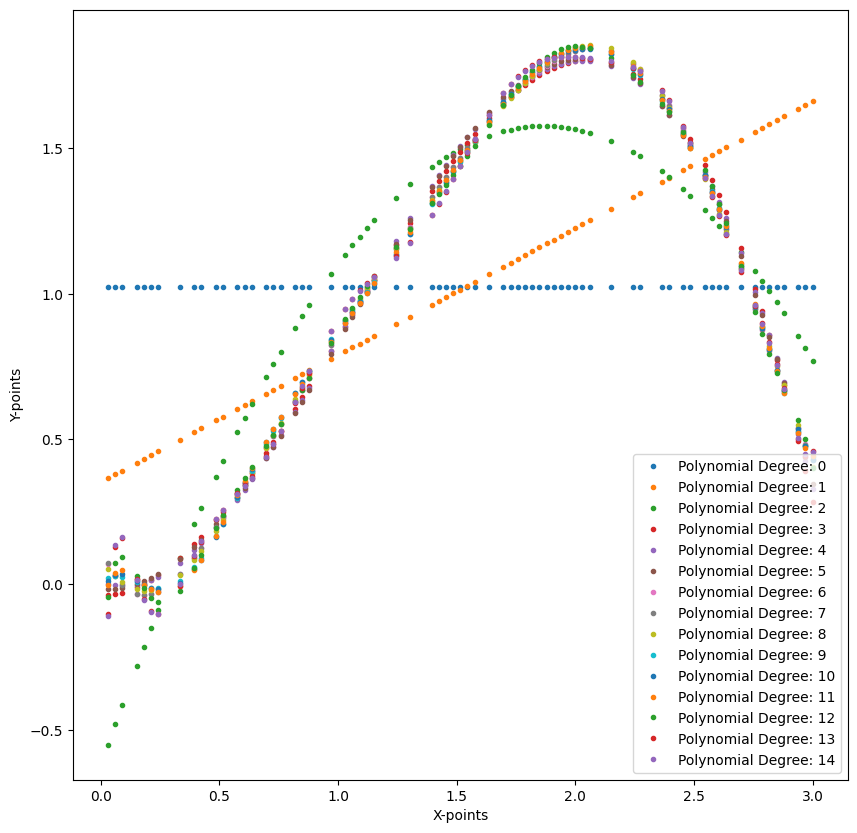

In [ ]:
fig2 = plt.figure(figsize = (10,10))
for i in range(max_d+1):
  best_fit = get_bestfit(X_train, Y_train, i)
  plt.plot(X_train, best_fit(X_train), ls = 'none', marker = '.', label = 'Polynomial Degree: %i' %i)
plt.xlabel("X-points")
plt.ylabel("Y-points")
plt.legend(loc = 'lower right')

### Plotting RMSE with respect to degree

### Calculate RMSE of training set

In [ ]:
degree_rmse_list = []
d_list = np.arange(0,max_d)
for i in range(max_d):
  best_curve = get_bestfit(X_train,Y_train,i)
  rmse = calculate_rmse(len(X_train),Y_train,best_curve(X_train))
  degree_rmse_list.append(rmse)
print(degree_rmse_list)

[0.6335477676824316, 0.5045748999110433, 0.24243437990395325, 0.09723717651257575, 0.095655191052992, 0.09535710322256254, 0.08873872903480837, 0.08872370488139826, 0.08815038068199245, 0.08690171565223395, 0.08679950320483631, 0.08655076882057226, 0.0840873293885835, 0.07724276370841955]


### Calculate RMSE of crossvalidation set

In [ ]:
crossvalid_rmse_list = []
d_list = np.arange(0,max_d)
for i in range(max_d):
  best_curve = get_bestfit(X_train,Y_train,i)
  rmse = calculate_rmse(len(X_valid),Y_valid,best_curve(X_valid))
  crossvalid_rmse_list.append(rmse)
print(crossvalid_rmse_list)

[0.6570616480224631, 0.40238997441575813, 0.26274027351918594, 0.09495272446057064, 0.09113635784605671, 0.0898101189597835, 0.10728019835486434, 0.10724733112021054, 0.1047628640138305, 0.09759616475848075, 0.09828911400211351, 0.10183624784483546, 0.12385353316193232, 0.20612336329183542]


### Plotting Training and Crossvalidation

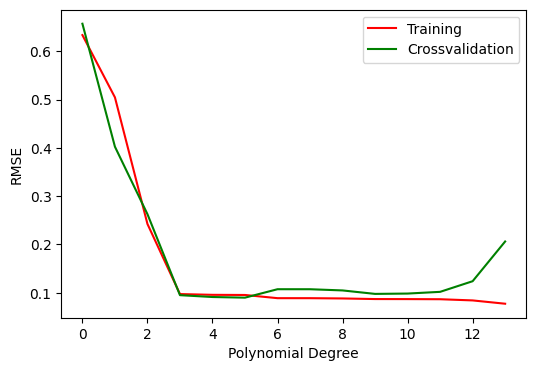

In [ ]:
fig3 = plt.figure(figsize = (6,4))
plt.plot(d_list,degree_rmse_list,'r', label = 'Training')
plt.plot(d_list,crossvalid_rmse_list, 'g', label = 'Crossvalidation')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.legend()